In [ ]:
# !pip install bayesian-optimization
# !pip install iteration-utilities

In [1]:
# for development:
%load_ext autoreload
%autoreload 2

# standards:
import numpy as np
import pandas as pd

# graphics:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from cmcrameri import cm
import cmocean

import tqdm
# Fix global random state

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap


import networkx as nx

import dill as pickle      


In [ ]:
# !mkdir instep

In [19]:
from simple_teams.n_agents_reasoning import team_reasoning_n_agents

three_agent_hilo = np.array([[[[3,3,3], [0,0,0]], [[0,0,0], [0,0,0]]], [[[0,0,0], [0,0,0]],[[0,0,0], [1,1,1]]]])

high_mid_low = np.array([[[[3,3,3], [0,0,0], [0,0,0]], [[0,0,0],[0,0,0], [0,0,0]], [[0,0,0], [0,0,0], [0,0,0]]], [[[0,0,0], [0,0,0], [0,0,0]], [[0,0,0],[2,2,2], [0,0,0]], [[0,0,0], [0,0,0], [0,0,0]]], [[[0,0,0], [0,0,0], [0,0,0]], [[0,0,0],[0,0,0], [0,0,0]], [[0,0,0], [0,0,0], [1,1,1]]]])

three_agent_PD = np.array([[[[1,1,1], [1,1,2]], [[1,2,1], [-1,0,0]]], [[[2,1,1], [0,-1,0]],[[0,0,-1], [0,0,0]]]])

print(team_reasoning_n_agents(2, 3, three_agent_PD, 0.6))

game is now in gambit


In [13]:
from simple_teams.game_structure import game, game_mixture

prisoners_dilemma = game(
    name="Prisoners Dilemma",
    n_players=2,
    n_choices=2,
    payoffs=[[3, 3], [-3, 4],[4, -3],  [1,1]],
#     payoffs=[[2, 3], [0, -6],[0, 2],  [1,1]],

    size=dict(width=700, height=170),
)

prisoners_dilemma.show_game()
prisoners_dilemma.set_up_TR_strategies(100)
prisoners_dilemma.plot_TR_utils(player=0,figsize=(13, 5))
plt.savefig('instep/pd_utils.png',dpi=300,bbox_inches='tight')


SankeyWidget(layout=Layout(height='170', width='700'), links=[{'source': '(0) init', 'target': '(1) Player: 1,…

[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]


Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]


Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]


Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]


Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]


Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]


Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (1, 0), (1, 1)]


Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

SankeyWidget(layout=Layout(height='170', width='700'), links=[{'source': '(0) init', 'target': '(1) Player: 1,…

[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3. 0.]
  [0. 1.]]

 [[3. 0.]
  [0. 1.]]

 [[3. 0.]
  [0. 1.]]

 [[3. 0.]
  [0. 1.]]]
1 [[[3. 0.]
  [0. 1.]]

 [[3. 0.]
  [0. 1.]]

 [[3. 0.]
  [0. 1.]]

 [[3. 0.]
  [0. 1.]]]
2 [[[3. 0.]
  [0. 1.]]

 [[3. 0.]
  [0. 1.]]

 [[3. 0.]
  [0. 1.]]

 [[3. 0.]
  [0. 1.]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         0.03030303]
  [0.03030303 0.9802061 ]]

 [[2.96969697 0.        ]
  [0.03999592 0.98989899]]

 [[2.96969697 0.03999592]
  [0.         0.98989899]]

 [[2.93980206 0.01010101]
  [0.01010101 1.        ]]]
1 [[[3.         0.03030303]
  [0.03030303 0.9802061 ]]

 [[2.96969697 0.        ]
  [0.03999592 0.98989899]]

 [[2.96969697 0.03999592]
  [0.         0.98989899]]

 [[2.93980206 0.01010101]
  [0.01010101 1.        ]]]
2 [[[3.         0.03030303]
  [0.03030303 0.9802061 ]]

 [[2.96969697 0.        ]
  [0.03999592 0.98989899]]

 [[2.96969697 0.03999592]
  [0.         0.98989899]]

 [[2.93980206 0.01010101]
  [0.01010101 1.        ]]]
[(0, 0), (

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         0.18181818]
  [0.18181818 0.89348026]]

 [[2.81818182 0.        ]
  [0.22773186 0.93939394]]

 [[2.81818182 0.22773186]
  [0.         0.93939394]]

 [[2.65105601 0.06060606]
  [0.06060606 1.        ]]]
1 [[[3.         0.18181818]
  [0.18181818 0.89348026]]

 [[2.81818182 0.        ]
  [0.22773186 0.93939394]]

 [[2.81818182 0.22773186]
  [0.         0.93939394]]

 [[2.65105601 0.06060606]
  [0.06060606 1.        ]]]
2 [[[3.         0.18181818]
  [0.18181818 0.89348026]]

 [[2.81818182 0.        ]
  [0.22773186 0.93939394]]

 [[2.81818182 0.22773186]
  [0.         0.93939394]]

 [[2.65105601 0.06060606]
  [0.06060606 1.        ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         0.21212121]
  [0.21212121 0.87858382]]

 [[2.78787879 0.        ]
  [0.26283032 0.92929293]]

 [[2.78787879 0.26283032]
  [0.         0.92929293]]

 [[2.59575554 0.07070707]
  [0.07070707 1.        ]]]
1 [[[3.         0.21212121]
  [0.21212121 0.87858382]]

 [[2.7

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         0.48484848]
  [0.48484848 0.78124681]]

 [[2.51515152 0.        ]
  [0.54198551 0.83838384]]

 [[2.51515152 0.54198551]
  [0.         0.83838384]]

 [[2.13478217 0.16161616]
  [0.16161616 1.        ]]]
1 [[[3.         0.48484848]
  [0.48484848 0.78124681]]

 [[2.51515152 0.        ]
  [0.54198551 0.83838384]]

 [[2.51515152 0.54198551]
  [0.         0.83838384]]

 [[2.13478217 0.16161616]
  [0.16161616 1.        ]]]
2 [[[3.         0.48484848]
  [0.48484848 0.78124681]]

 [[2.51515152 0.        ]
  [0.54198551 0.83838384]]

 [[2.51515152 0.54198551]
  [0.         0.83838384]]

 [[2.13478217 0.16161616]
  [0.16161616 1.        ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         0.51515152]
  [0.51515152 0.7745128 ]]

 [[2.48484848 0.        ]
  [0.56892154 0.82828283]]

 [[2.48484848 0.56892154]
  [0.         0.82828283]]

 [[2.08764412 0.17171717]
  [0.17171717 1.        ]]]
1 [[[3.         0.51515152]
  [0.51515152 0.7745128 ]]

 [[2.4

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         0.81818182]
  [0.81818182 0.75206612]]

 [[2.18181818 0.        ]
  [0.79338843 0.72727273]]

 [[2.18181818 0.79338843]
  [0.         0.72727273]]

 [[1.66115702 0.27272727]
  [0.27272727 1.        ]]]
1 [[[3.         0.81818182]
  [0.81818182 0.75206612]]

 [[2.18181818 0.        ]
  [0.79338843 0.72727273]]

 [[2.18181818 0.79338843]
  [0.         0.72727273]]

 [[1.66115702 0.27272727]
  [0.27272727 1.        ]]]
2 [[[3.         0.81818182]
  [0.81818182 0.75206612]]

 [[2.18181818 0.        ]
  [0.79338843 0.72727273]]

 [[2.18181818 0.79338843]
  [0.         0.72727273]]

 [[1.66115702 0.27272727]
  [0.27272727 1.        ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         0.84848485]
  [0.84848485 0.75431078]]

 [[2.15151515 0.        ]
  [0.81134578 0.71717172]]

 [[2.15151515 0.81134578]
  [0.         0.71717172]]

 [[1.62299765 0.28282828]
  [0.28282828 1.        ]]]
1 [[[3.         0.84848485]
  [0.84848485 0.75431078]]

 [[2.1

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         1.21212121]
  [1.21212121 0.84491378]]

 [[1.78787879 0.        ]
  [0.96316702 0.5959596 ]]

 [[1.78787879 0.96316702]
  [0.         0.5959596 ]]

 [[1.22875217 0.4040404 ]
  [0.4040404  1.        ]]]
1 [[[3.         1.21212121]
  [1.21212121 0.84491378]]

 [[1.78787879 0.        ]
  [0.96316702 0.5959596 ]]

 [[1.78787879 0.96316702]
  [0.         0.5959596 ]]

 [[1.22875217 0.4040404 ]
  [0.4040404  1.        ]]]
2 [[[3.         1.21212121]
  [1.21212121 0.84491378]]

 [[1.78787879 0.        ]
  [0.96316702 0.5959596 ]]

 [[1.78787879 0.96316702]
  [0.         0.5959596 ]]

 [[1.22875217 0.4040404 ]
  [0.4040404  1.        ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         1.24242424]
  [1.24242424 0.85776962]]

 [[1.75757576 0.        ]
  [0.97051321 0.58585859]]

 [[1.75757576 0.97051321]
  [0.         0.58585859]]

 [[1.20120396 0.41414141]
  [0.41414141 1.        ]]]
1 [[[3.         1.24242424]
  [1.24242424 0.85776962]]

 [[1.7

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         1.57575758]
  [1.57575758 1.05305581]]

 [[1.42424242 0.        ]
  [0.99744924 0.47474747]]

 [[1.42424242 0.99744924]
  [0.         0.47474747]]

 [[0.95204571 0.52525253]
  [0.52525253 1.        ]]]
1 [[[3.         1.57575758]
  [1.57575758 1.05305581]]

 [[1.42424242 0.        ]
  [0.99744924 0.47474747]]

 [[1.42424242 0.99744924]
  [0.         0.47474747]]

 [[0.95204571 0.52525253]
  [0.52525253 1.        ]]]
2 [[[3.         1.57575758]
  [1.57575758 1.05305581]]

 [[1.42424242 0.        ]
  [0.99744924 0.47474747]]

 [[1.42424242 0.99744924]
  [0.         0.47474747]]

 [[0.95204571 0.52525253]
  [0.52525253 1.        ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         1.60606061]
  [1.60606061 1.07570656]]

 [[1.39393939 0.        ]
  [0.99500051 0.46464646]]

 [[1.39393939 0.99500051]
  [0.         0.46464646]]

 [[0.93429242 0.53535354]
  [0.53535354 1.        ]]]
1 [[[3.         1.60606061]
  [1.60606061 1.07570656]]

 [[1.3

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL


[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         1.87878788]
  [1.87878788 1.31629426]]

 [[1.12121212 0.        ]
  [0.936231   0.37373737]]

 [[1.12121212 0.936231  ]
  [0.         0.37373737]]

 [[0.81124375 0.62626263]
  [0.62626263 1.        ]]]
1 [[[3.         1.87878788]
  [1.87878788 1.31629426]]

 [[1.12121212 0.        ]
  [0.936231   0.37373737]]

 [[1.12121212 0.936231  ]
  [0.         0.37373737]]

 [[0.81124375 0.62626263]
  [0.62626263 1.        ]]]
2 [[[3.         1.87878788]
  [1.87878788 1.31629426]]

 [[1.12121212 0.        ]
  [0.936231   0.37373737]]

 [[1.12121212 0.936231  ]
  [0.         0.37373737]]

 [[0.81124375 0.62626263]
  [0.62626263 1.        ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         1.90909091]
  [1.90909091 1.34710744]]

 [[1.09090909 0.        ]
  [0.92561983 0.36363636]]

 [[1.09090909 0.92561983]
  [0.         0.36363636]]

 [[0.80165289 0.63636364]
  [0.63636364 1.        ]]]
1 [[[3.         1.90909091]
  [1.90909091 1.34710744]]

 [[1.

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL


1 [[[3.         2.12121212]
  [2.12121212 1.58565453]]

 [[0.87878788 0.        ]
  [0.82848689 0.29292929]]

 [[0.87878788 0.82848689]
  [0.         0.29292929]]

 [[0.7573717  0.70707071]
  [0.70707071 1.        ]]]
2 [[[3.         2.12121212]
  [2.12121212 1.58565453]]

 [[0.87878788 0.        ]
  [0.82848689 0.29292929]]

 [[0.87878788 0.82848689]
  [0.         0.29292929]]

 [[0.7573717  0.70707071]
  [0.70707071 1.        ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         2.15151515]
  [2.15151515 1.62299765]]

 [[0.84848485 0.        ]
  [0.81134578 0.28282828]]

 [[0.84848485 0.81134578]
  [0.         0.28282828]]

 [[0.75431078 0.71717172]
  [0.71717172 1.        ]]]
1 [[[3.         2.15151515]
  [2.15151515 1.62299765]]

 [[0.84848485 0.        ]
  [0.81134578 0.28282828]]

 [[0.84848485 0.81134578]
  [0.         0.28282828]]

 [[0.75431078 0.71717172]
  [0.71717172 1.        ]]]
2 [[[3.         2.15151515]
  [2.15151515 1.62299765]]

 [[0.84848485 0.        ]
  [0.8113457

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         2.42424242]
  [2.42424242 1.99581675]]

 [[0.57575758 0.        ]
  [0.62034486 0.19191919]]

 [[0.57575758 0.62034486]
  [0.         0.19191919]]

 [[0.76349352 0.80808081]
  [0.80808081 1.        ]]]
1 [[[3.         2.42424242]
  [2.42424242 1.99581675]]

 [[0.57575758 0.        ]
  [0.62034486 0.19191919]]

 [[0.57575758 0.62034486]
  [0.         0.19191919]]

 [[0.76349352 0.80808081]
  [0.80808081 1.        ]]]
2 [[[3.         2.42424242]
  [2.42424242 1.99581675]]

 [[0.57575758 0.        ]
  [0.62034486 0.19191919]]

 [[0.57575758 0.62034486]
  [0.         0.19191919]]

 [[0.76349352 0.80808081]
  [0.80808081 1.        ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         2.45454545]
  [2.45454545 2.04132231]]

 [[0.54545455 0.        ]
  [0.59504132 0.18181818]]

 [[0.54545455 0.59504132]
  [0.         0.18181818]]

 [[0.76859504 0.81818182]
  [0.81818182 1.        ]]]
1 [[[3.         2.45454545]
  [2.45454545 2.04132231]]

 [[0.5

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL

[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         2.78787879]
  [2.78787879 2.59575554]]

 [[0.21212121 0.        ]
  [0.26283032 0.07070707]]

 [[0.21212121 0.26283032]
  [0.         0.07070707]]

 [[0.87858382 0.92929293]
  [0.92929293 1.        ]]]
1 [[[3.         2.78787879]
  [2.78787879 2.59575554]]

 [[0.21212121 0.        ]
  [0.26283032 0.07070707]]

 [[0.21212121 0.26283032]
  [0.         0.07070707]]

 [[0.87858382 0.92929293]
  [0.92929293 1.        ]]]
2 [[[3.         2.78787879]
  [2.78787879 2.59575554]]

 [[0.21212121 0.        ]
  [0.26283032 0.07070707]]

 [[0.21212121 0.26283032]
  [0.         0.07070707]]

 [[0.87858382 0.92929293]
  [0.92929293 1.        ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[3.         2.81818182]
  [2.81818182 2.65105601]]

 [[0.18181818 0.        ]
  [0.22773186 0.06060606]]

 [[0.18181818 0.22773186]
  [0.         0.06060606]]

 [[0.89348026 0.93939394]
  [0.93939394 1.        ]]]
1 [[[3.         2.81818182]
  [2.81818182 2.65105601]]

 [[0.1

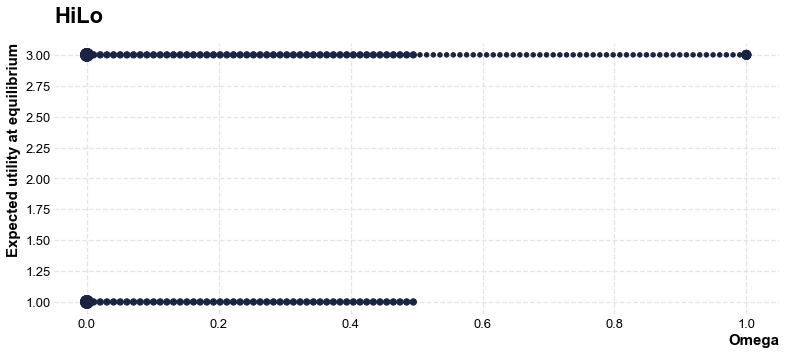

In [14]:

hilo = game(
    name="HiLo",
    n_players=2,
    n_choices=2,
    payoffs=[[3,3], [0,0], [0,0], [1,1]],
#     payoffs=[[2,1], [0,0], [0,0], [1,2]],

    size=dict(width=700, height=170),
)

hilo.show_game()

hilo.set_up_TR_strategies(100)
hilo.plot_TR_utils(player=1,figsize=(13, 5))
# plt.savefig('instep/hilo_utils.png',dpi=300,bbox_inches='tight')


In [ ]:
# hilo.player_data


In [16]:
        
my_game_mixture = game_mixture([[prisoners_dilemma,.5],
                                [hilo,0.5]])



from simple_teams.team_reasoning import calculate_utils
from simple_teams.team_reasoning import team_reason

matrix_player_0 = game.return_players_matrix(prisoners_dilemma, 0)

print(matrix_player_0)

print(calculate_utils(0.5, matrix_player_0))

print(team_reason(matrix_player_0, matrix_player_0, 0.4))



[[ 3 -3]
 [ 4  1]]
[[[ 3.    0.  ]
  [ 3.5   1.25]]

 [[ 0.   -3.  ]
  [ 1.25 -1.  ]]

 [[ 3.5   1.25]
  [ 4.    2.5 ]]

 [[ 1.25 -1.  ]
  [ 2.5   1.  ]]]
[(0, 0), (0, 1), (1, 0), (1, 1)]
0 [[[ 3.   -0.6 ]
  [ 3.6   1.08]]

 [[ 0.6  -3.  ]
  [ 1.92 -0.6 ]]

 [[ 3.4   0.52]
  [ 4.    2.2 ]]

 [[ 1.48 -1.4 ]
  [ 2.8   1.  ]]]
1 [[[ 3.   -0.6 ]
  [ 3.6   1.08]]

 [[ 0.6  -3.  ]
  [ 1.92 -0.6 ]]

 [[ 3.4   0.52]
  [ 4.    2.2 ]]

 [[ 1.48 -1.4 ]
  [ 2.8   1.  ]]]
2 [[[ 3.   -0.6 ]
  [ 3.6   1.08]]

 [[ 0.6  -3.  ]
  [ 1.92 -0.6 ]]

 [[ 3.4   0.52]
  [ 4.    2.2 ]]

 [[ 1.48 -1.4 ]
  [ 2.8   1.  ]]]
{'0': {'strategies': [array([0., 1.])], 'utils': [4.0]}, '1': {'strategies': [array([1., 0.])], 'utils': [4.0]}, '2': {'strategies': [array([1., 0.])], 'utils': [4.0]}, 'tr_consistent_payoffs': [4]}


Search for Nash equilibria in pure strategies
Gambit version 16.0.2, Copyright (C) 1994-2022, The Gambit Project
This is free software, distributed under the GNU GPL



In [ ]:
# G = nx.random_partition_graph([8 for x in range(4)], 0.6,0.01)
G = nx.complete_graph(32)
# G = nx.powerlaw_cluster_graph(32,1,0.01)

# G =  nx.erdos_renyi_graph(32,p=0.4)
def ensure_graph_connectivity(G):
    for node in list(nx.isolates(G)):
        random_connection = node
        while random_connection == node:
            random_connection = np.random.randint(len(G.nodes()))
        G.add_edge(node,random_connection)
    return G

def plot_graph(G, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.style.use("opinions.mplstyle")
    positions = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, positions, node_size=120, node_color="#1a2340", alpha=0.8)
    nx.draw_networkx_edges(G, positions, edge_color="grey", width=1, alpha=1)
    plt.axis('off')

G = ensure_graph_connectivity(G)
plot_graph(G)
plt.savefig('instep/complete_graph_img.png',dpi=300,bbox_inches='tight')


In [ ]:
from simple_teams import model 
from simple_teams.learners import bayesian_gaussian_process 

model = model.team_reasoning_model(
    proportion_team_reasoners=0.7,
    n_agents=32,
    init_network=G,
    games=my_game_mixture,#prisoners_dilemma,#my_game_mixture,
    probability_team_reasoning=1,
    utility_calculation="expected_utility",
    learner = bayesian_gaussian_process(window=12, kappa=4, xi=0.0, alpha=.7)
    
)


# expected_utility
for t in tqdm.tqdm_notebook(range(40)):
    model.step()
    
    
# https://www.youtube.com/watch?v=aZa8Wd8Nc8o


In [ ]:
k = 3
plt.plot([x['omega'] for x  in model.schedule._agents[k].my_learner.attempts])
plt.show()

for k in range(0,len(model.schedule._agents)):
    print(model.schedule._agents[k].team_reasoner)
    if model.schedule._agents[k].team_reasoner:
        c = 'green'
    else:
        c ='red'
#     print(model.schedule._agents[k].team_reasoner)
    plt.plot(np.cumsum([x['target'] for x  in model.schedule._agents[k].my_learner.attempts]),c=c)
plt.show()

# model.schedule._agents[k].my_learner.attempts

In [ ]:
k = 3

step = 38
omega = [x['omega'] for x  in model.schedule._agents[k].my_learner.attempts]
target = [x['target'] for x  in model.schedule._agents[k].my_learner.attempts]
dist_from_point = np.abs(step-np.linspace(0,len(omega),len(omega)))
print(dist_from_point)

cmap = cmocean.cm.solar_r  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_tr_cmap = ListedColormap(my_cmap)


plt.scatter(omega,target,c=dist_from_point,cmap=my_tr_cmap)

distribution = model.schedule._agents[k].my_learner.distributions[step]
x = np.linspace(0, 1, 100)
# print(distribution)
plt.fill_between(x, distribution[0] + distribution[1], distribution[0] - distribution[1], alpha=0.1)

plt.plot(x,distribution[0], c="#1a2340", alpha=0.5)

plt.xlabel("Omega", labelpad=10)
plt.ylabel("Received Payoff", labelpad=10)
plt.show()

In [ ]:

fig = plt.figure(figsize=(20, 20))
ax = axes3d.Axes3D(fig)
ax.view_init(10, 50)

import cmocean

for ix, distribution in enumerate(
    model.schedule._agents[9].my_learner.distributions
):
    x = np.linspace(0, 1, 100)
    plt.plot([ix] * len(x), x, zs=distribution[0], c="#1a2340", alpha=0.5)
#     expected_value = distribution.expect()
#     ax.scatter(
#         np.array(ix),
#         np.array(expected_value),
#         np.array(distribution.pdf(expected_value)),
#         s=10,
#         c="black", alpha=0.6,
#     )
plt.title("Learning-progress of an individual agent", y=0.87)
ax.invert_xaxis()

plt.xlabel("Timestep", labelpad=10)
plt.ylabel("Probabilities", labelpad=10)
ax.set_zlabel("Probability-density")

In [ ]:
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

cmap = cmocean.cm.solar_r  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_tr_cmap = ListedColormap(my_cmap)

cmap = cmocean.cm.deep  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_non_tr_cmap = ListedColormap(my_cmap)

fig, ax = plt.subplots(figsize=(16, 8))

agents = [model.schedule._agents[x] for x in model.schedule._agents.keys()]
# agents = agents[0:2]
mappings = []
for agent in tqdm.tqdm_notebook(agents):
    collected_values = []
    for ix, distribution in enumerate(agent.my_learner.distributions):

        n = 100
        x = np.linspace(0, 1, n)
        alphas = distribution[0]#distribution.pdf(x)
        #         alphas = (alphas - np.min(alphas)) / (np.max(alphas) - np.min(alphas))
        collected_values.append(alphas)
    mappings.append(np.hstack([x.reshape(-1, 1) for x in collected_values]))


sns.heatmap(
np.mean(
    np.stack(
        [
            mappings[x]
            for x in np.where([agent.team_reasoner for agent in agents])[0]
        ], axis=2
    ),
    axis=2,
),
    cmap=my_tr_cmap,
    cbar=True,
)
ax.invert_yaxis()
plt.show()

fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(
np.mean(
    np.stack(
        [
            mappings[x]
            for x in np.where([not agent.team_reasoner for agent in agents])[0]
        ], axis=2
    ),
    axis=2,
),
    
    cmap=my_non_tr_cmap,
    cbar=True,
)
ax.invert_yaxis()
plt.show()




In [ ]:
list(range(0,1))

# multirun


In [ ]:
# random_partition

In [ ]:
from simple_teams import model 
from simple_teams.learners import bayesian_gaussian_process 


model_list = []



pd_share = [0.5]#np.linspace(0,1,9)#9
tr_proportions = np.linspace(0,1,21)#11

for this_pd_share in tqdm.tqdm_notebook(pd_share):
    my_game_mixture = game_mixture([[prisoners_dilemma,this_pd_share],
                                [hilo,1-this_pd_share]])
    
    for tr_proportion in tqdm.tqdm_notebook(tr_proportions):
        n=0
        while n<3: #dirty hack to avoid untracked error
#         for ix in range(0,3):
    #         G = nx.powerlaw_cluster_graph(32,1,0.01)
            try:
                G = nx.random_partition_graph([8 for x in range(4)], 0.6,0.01)

                G = ensure_graph_connectivity(G)


                this_model = model.team_reasoning_model(
                    proportion_team_reasoners=tr_proportion,
                    n_agents=32,
                    init_network=G,
                    games=my_game_mixture,#prisoners_dilemma,#my_game_mixture,
                    probability_team_reasoning=1,
                    utility_calculation="expected_utility",
                    learner = bayesian_gaussian_process(window=12, kappa=4, xi=0.0, alpha=.7)

                )


                # expected_utility
                for t in tqdm.tqdm_notebook(range(30)):
                    this_model.step()
                model_list.append(this_model)
                n+=1
            except:
                pass
            
            
pickle.dump(model_list, open('instep/random_partition_simulations_pickle.pkl', 'wb')) 

In [ ]:
# fully_connected

from simple_teams import model 
from simple_teams.learners import bayesian_gaussian_process 


model_list = []



pd_share = [0.5]#np.linspace(0,1,9)#9
tr_proportions = np.linspace(0,1,21)#11

for this_pd_share in tqdm.tqdm_notebook(pd_share):
    my_game_mixture = game_mixture([[prisoners_dilemma,this_pd_share],
                                [hilo,1-this_pd_share]])
    
    for tr_proportion in tqdm.tqdm_notebook(tr_proportions):
        
        n=0
        while n<3: #dirty hack to avoid untracked error
#         for ix in range(0,3):
    #         G = nx.powerlaw_cluster_graph(32,1,0.01)
            try:
                G = nx.complete_graph(32)

                G = ensure_graph_connectivity(G)


                this_model = model.team_reasoning_model(
                    proportion_team_reasoners=tr_proportion,
                    n_agents=32,
                    init_network=G,
                    games=my_game_mixture,#prisoners_dilemma,#my_game_mixture,
                    probability_team_reasoning=1,
                    utility_calculation="expected_utility",
                    learner = bayesian_gaussian_process(window=12, kappa=4, xi=0.0, alpha=.7)

                )


                # expected_utility
                for t in tqdm.tqdm_notebook(range(30)):
                    this_model.step()
                model_list.append(this_model)
                n+=1
            except:
                pass

            
pickle.dump(model_list, open('instep/complete_graph_simulations_pickle.pkl', 'wb')) 

In [ ]:
from simple_teams import model 
from simple_teams.learners import bayesian_gaussian_process 


model_list = []



pd_share = [0.5]#np.linspace(0,1,9)#9
tr_proportions = np.linspace(0,1,21)#11

for this_pd_share in tqdm.tqdm_notebook(pd_share):
    my_game_mixture = game_mixture([[prisoners_dilemma,this_pd_share],
                                [hilo,1-this_pd_share]])
    
    for tr_proportion in tqdm.tqdm_notebook(tr_proportions):
        n=0
        while n<3: #dirty hack to avoid untracked error

            try:
                G = nx.powerlaw_cluster_graph(32,1,0.01)
                G = ensure_graph_connectivity(G)


                this_model = model.team_reasoning_model(
                    proportion_team_reasoners=tr_proportion,
                    n_agents=32,
                    init_network=G,
                    games=my_game_mixture,#prisoners_dilemma,#my_game_mixture,
                    probability_team_reasoning=1,
                    utility_calculation="expected_utility",
                    learner = bayesian_gaussian_process(window=12, kappa=4, xi=0.0, alpha=.7)

                )


                # expected_utility
                for t in tqdm.tqdm_notebook(range(30)):
                    this_model.step()
                model_list.append(this_model)
                n+=1
            except:
                print('some error')
                pass
            
pickle.dump(model_list, open('instep/powerlaw_cluster_simulations_pickle_2.pkl', 'wb')) 

In [ ]:
len(model_list_2)

In [ ]:

model_list_2 = pickle.load(open(r"instep/random_partition_simulations_pickle.pkl","rb"))


In [ ]:
collected_payoffs = []
for ix,this_model in enumerate(model_list_2):
    current_tr_proportion =this_model.proportion_team_reasoners
    for agent in [this_model.schedule._agents[k] for k in this_model.schedule._agents.keys()]:
#         print(agent.team_reasoner)
        collected_payoffs.append((current_tr_proportion,
                                  np.sum([x['target'] for x  in agent.my_learner.attempts]),
                                 np.int(agent.team_reasoner)))
        
        
collected_payoffs = np.array(collected_payoffs)

In [ ]:
from pygam import LinearGAM
from pygam import ExpectileGAM

X,y = collected_payoffs[:,0].reshape(-1,1), collected_payoffs[:,1].reshape(-1,1)

gam = LinearGAM().gridsearch(X, y)
# gam.summary()

In [ ]:
w_tr = collected_payoffs[:,2].astype(bool)#np.where(collected_payoffs[:,2]==1)

X_tr, y_tr = collected_payoffs[w_tr,0].reshape(-1,1),collected_payoffs[w_tr,1].reshape(-1,1)

gam_tr = LinearGAM().gridsearch(X_tr, y_tr)
# gam_tr.summary()

In [ ]:
w_nontr = ~collected_payoffs[:,2].astype(bool)#np.where(collected_payoffs[:,2]==1)
# print(w_nontr)
X_nontr, y_nontr = collected_payoffs[w_nontr,0].reshape(-1,1),collected_payoffs[w_nontr,1].reshape(-1,1)

gam_nontr = LinearGAM().gridsearch(X_nontr, y_nontr)
# gam_nontr.summary()

In [ ]:


fig, ax = plt.subplots(figsize=(8, 10))
newcmap = cmocean.tools.crop_by_percent(cmocean.cm.haline, 30, which='both', N=None)

plt.scatter(x=collected_payoffs[:,0]+np.random.rand(collected_payoffs.shape[0])*0.02,
            y= collected_payoffs[:,1],
            c=[['#1a2340','#f98400'][int(x)] for x in collected_payoffs[:,2]],
           alpha=0.5
           )

# plt.scatter(x=collected_payoffs[w_tr,0]+np.random.rand(collected_payoffs[w_tr,0].shape[0])*0.02,
#             y= collected_payoffs[w_tr,1],
#            )

# plt.plot(np.unique(X), gam.predict(np.unique(X)), color='black', linewidth=3)
# conf = gam.confidence_intervals(np.unique(X), width=0.95, quantiles=None)
# ax.fill_between(np.unique(X),conf[:,0],conf[:,1], 
#                  facecolor='black', alpha=0.2,interpolate=True)




plt.plot(np.unique(X_tr), gam_tr.predict(np.unique(X_tr)), color='#f98400', linewidth=3)
conf = gam_tr.confidence_intervals(np.unique(X_tr), width=0.95, quantiles=None)
ax.fill_between(np.unique(X_tr),conf[:,0],conf[:,1], 
                 facecolor='#f98400', alpha=0.4,interpolate=True)



plt.plot(np.unique(X_nontr), gam_nontr.predict(np.unique(X_nontr)), color='#1a2340', linewidth=3)
conf = gam_nontr.confidence_intervals(np.unique(X_nontr), width=0.95, quantiles=None)
ax.fill_between(np.unique(X_nontr),conf[:,0],conf[:,1], 
                 facecolor='#1a2340', alpha=0.2,interpolate=True)


plt.xlabel("Proportion of Team-Reasoners")
plt.ylabel("Aggregated Payoffs")
# plt.show()

# plt.savefig('instep/community_payoffs.png',dpi=300,bbox_inches='tight')


In [ ]:
tr_proportions = np.linspace(0,1,11)


In [ ]:
# model_df = model.datacollector.get_model_vars_dataframe()
# agent_df = model.datacollector.get_agent_vars_dataframe()

# agent_df = agent_df.reset_index()

In [ ]:
# [.my_learner.my_distributions[].expect() for y in model.schedule._agents[20]]

In [ ]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# fig, ax =plt.subplots(figsize=(20,20))

# step_to_plot = 2
# plt.title(
#     "Probability of team-reasoning after "
#     + str(step_to_plot)
#     + " iterations"
# )
# final_agent_df = agent_df[agent_df["Step"] == step_to_plot]



# G = graph_list[step_to_plot]
# # positions = nx.kamada_kawai_layout(G)
# # position_array = np.array([positions[x] for x in positions])
# position_array = coords_list[step_to_plot]

# trs = final_agent_df["team_reasoner"]
# nx.draw_networkx_edges(G, position_array, edge_color="grey", alpha=0.5)



# tr_scatter= plt.scatter(position_array[trs,0],
#             position_array[trs,1], s= 100,#final_agent_df['gathered_utility'][trs] *.3,
#             c=final_agent_df['probability_team_reasoning'][trs],
#             cmap=cmocean.cm.thermal,
#             vmin=0, vmax=1,alpha=1.
            
#            )

# non_tr_scatter = plt.scatter(position_array[~trs,0],
#             position_array[~trs,1],  s= 110
#             , marker = '*',
#            c=final_agent_df['probability_team_reasoning'][~trs],cmap=cmocean.cm.thermal,
#             vmin=0, vmax=1
           
#            )

# # divider = make_axes_locatable(ax)
# # cax = divider.append_axes("right", size="5%", pad=0.05)
   
# cbar = plt.colorbar(tr_scatter,fraction=0.02, pad=0.0)
# cbar.set_label('Probability of team-reasoning',fontsize=10)
# cbar.ax.tick_params(labelsize=10)
# ax.tick_params(labelsize=10)



# plt.legend((tr_scatter,non_tr_scatter),
#            ('Team-Reasoners','Non-Team-Reasoners'),
#            scatterpoints=3,
#            loc='upper right',
#            ncol=1,
#            fontsize=8)
# ax = plt.gca()
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('#fb9e40')
# leg.legendHandles[1].set_color('#092f59')


# plt.axis('equal')
# plt.savefig('network_towards_the_beginning')#,dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
# plt.style.use("opinions.mplstyle")

to_plot = agent_df[agent_df["Step"] == np.max(agent_df["Step"])]

# Plot the orbital period with horizontal boxes
sns.boxplot(
    x="team_reasoner",
    y="gathered_utility",
    data=to_plot,
    whis=[0, 100],
    width=0.6,
    palette=["#1a2340", "#f2ad00"],
)

# Add in points to show each observation
sns.stripplot(
    x="team_reasoner",
    y="gathered_utility",
    data=to_plot,
    size=4,
    color="black",
    linewidth=0,
    alpha=0.5,
)

plt.xlabel("Team-reasoner")
plt.ylabel("Utility")
plt.title(
    "Achieved utility in PD after " + str(np.max(agent_df["Step"])) + " iterations"
)

In [ ]:
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

cmap = cmocean.cm.solar_r  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_tr_cmap = ListedColormap(my_cmap)

cmap = cmocean.cm.deep  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_non_tr_cmap = ListedColormap(my_cmap)

fig, ax = plt.subplots(figsize=(16, 8))

agents = [model.schedule._agents[x] for x in model.schedule._agents.keys()]
# agents = agents[0:2]
mappings = []
for agent in tqdm.tqdm_notebook(agents):
    collected_values = []
    for ix, distribution in enumerate(agent.my_learner.distributions):

        n = 500
        x = np.linspace(0, 1, n)
        alphas = distribution[0]
        #         alphas = (alphas - np.min(alphas)) / (np.max(alphas) - np.min(alphas))
        collected_values.append(alphas)
    mappings.append(np.hstack([x.reshape(-1, 1) for x in collected_values]))

In [ ]:
tr_stack = np.mean(
    np.stack(
        [
            mappings[x]
            for x in np.where([agent.team_reasoner for agent in agents])[0]
        ], axis=2
    ),
    axis=2,
)

non_tr_stack =np.mean(
    np.stack(
        [
            mappings[x]
            for x in np.where([not agent.team_reasoner for agent in agents])[0]
        ], axis=2
    ),
    axis=2,
)


sns.heatmap(tr_stack)

In [ ]:
dom = (non_tr_stack-tr_stack)/np.max(non_tr_stack-tr_stack)

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
# plt.imshow(tr_stack,cmap=my_tr_cmap,origin='upper', aspect='auto')
# facecolor='#FF0000'
plt.imshow(tr_stack,cmap=my_tr_cmap,origin='upper', aspect='auto')
# plt.imshow(non_tr_stack,cmap=my_non_tr_cmap,origin='upper', alpha= dom, aspect='auto')
plt.savefig('stream_plot_2_tr_70')#,dpi=600)

# remem

In [ ]:
a.T-a

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
a = np.repeat(np.linspace(0,1,500),500).reshape(500,500)
# a_ = a.T+a
# ap = a_#(a_)/np.max(a_)

plt.imshow(a,cmap=my_tr_cmap,origin='upper', aspect='auto',alpha=a-a.T/3)
plt.imshow(a.T,cmap=my_non_tr_cmap,origin='upper', aspect='auto',alpha=a.T-a/3)

plt.savefig('stream_plotlegend')

In [ ]:
from simple_teams.generate_colormap import get_continuous_cmap


hex_list = ['#4b1148','#4b1148','#d98773', '#ecefe4','#ecefe4','#68aa88','#151f44','#151f44', ]
float_list=[0,.15,.35,.5,.51, .65,.85, 1]
    
    
    
fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(tr_stack+non_tr_stack
            ,cmap=get_continuous_cmap(hex_list, float_list=float_list),
                cbar=True,center=0
)
ax.invert_yaxis()
plt.show()

In [ ]:
# sns.heatmap(np.max(np.stack([tr_stack,non_tr_stack],axis=2),axis=2))

fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(tr_stack-non_tr_stack
            ,cmap=cmocean.cm.solar_r,
                cbar=True,center=0
)
ax.invert_yaxis()
plt.show()


In [ ]:
# [x[0] for x in graph_listsb]

In [ ]:
from mesa.batchrunner import BatchRunner,BatchRunnerMP
from simple_teams.model import team_reasoning_model
from simple_teams.learners import bayesian_beta_learner


fixed_params = {
    "n_agents": 200,
    "game": prisoners_dilemma,
    "probability_team_reasoning": 1.0,  # we need to take this out
    "utility_calculation": "expected_utility",
    # "learner": bayesian_beta_learner(prior={'type':'flat'})
}

#bayesian_beta_learner(prior={'type':'flat'})
var_params = {
        "tr_threshold": np.linspace(0.05,0.95,5),
        "proportion_team_reasoners":np.linspace(0.05,0.95,5),
        "init_network": [x[0] for x in graph_lists][0],

}


# batchrunner.BatchRunner(model_cls, variable_parameters=None, fixed_parameters=None,
# iterations=1, max_steps=1000, model_reporters=None, agent_reporters=None, display_progress=True)
batch_run = BatchRunner(
team_reasoning_model,
variable_parameters=var_params,
fixed_parameters=fixed_params,
iterations=3,
max_steps=100,
display_progress=True, 
   agent_reporters = {"my_learner":"my_learner"},

# model_reporters = {
#             "proportion_team_reasoners": lambda a: getattr(
#                 a, "proportion_team_reasoners", None
#             ),
#         }
)

batch_run.run_all()


In [ ]:
# run_data = batch_run.get_model_vars_dataframe()
run_data = batch_run.get_agent_vars_dataframe()
run_data

In [ ]:
# for this_run in np.unique(run_data['Run']):
#     this_run_data = run_data[run_data['Run']==this_run]
#     span = np.linspace(0, 1, 100)
#     learned_distributions = []
#     for this_learner in this_run_data['my_learner']:
#         this_dist = this_learner.my_distributions[-1].pdf(span)
#         # plt.plot(span,this_dist,alpha=0.03,c='#1a2340')
#         learned_distributions.append(this_dist)
    
#     plt.plot(span,np.mean(np.vstack(learned_distributions),axis=0),
#              alpha=.9,c='#B12806')

#     plt.show()

In [ ]:
def plot_parameter_grid_learners(data,row,column,figsize=(10,10)):
    row_values = np.unique(data[row])
    column_values = np.unique(data[column])
    
    fig = plt.figure(constrained_layout=True, figsize=figsize)
    gs = fig.add_gridspec(nrows=len(row_values), ncols=len(column_values))

    counter = 0
    span = np.linspace(0, 1, 100)

    for ix,x in enumerate(row_values):
        for iy,y in enumerate(column_values):
            this_data = data[(data[row]==x) & (data[column]==y)]
            this_axis = fig.add_subplot(gs[ix,iy])
            
            for this_run in np.unique(this_data['Run']):
                this_run_data = this_data[this_data['Run']==this_run]
                learned_distributions = []
                for this_learner in this_run_data['my_learner']:
                    this_dist = this_learner.my_distributions[-1].pdf(span)
                    # plt.plot(span,this_dist,alpha=0.03,c='#861111')
                    learned_distributions.append(this_dist)
                
                
                # print(row +' = ' + str(x) +'; '+ column +' = ' + str(y))
                this_axis = plt.plot(span,np.mean(np.vstack(learned_distributions),axis=0),
                alpha=.3,c='#6B1307')
                # this_axis.suptitle(row +' = ' + str(x) +'; '+ column +' = ' + str(y))
             
            
            counter+=1
            
plot_parameter_grid_learners(run_data,'tr_threshold','proportion_team_reasoners',figsize=(10,10))

In [ ]:
plot_parameter_grid_learners(run_data,'tr_threshold',
                             'proportion_team_reasoners',figsize=(10,10))

Johannes Notes:

    * Discuss TR assymetry: Why can't nontrs learn?
    * Brauchen wir überhaupt Dirichlet, wenn das Lernen nur TR vs non-TR ist?
    
Leyla notes:
    * Eigene probability einbeziehen?
    * Erkläre mir: Wie entscheiden wir aufgrund payoffs? 